# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Diana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()

True

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="bitcoin AND canada AND 2020",
    language="en"
)
bitcoin_news_en["totalResults"]

142

In [5]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="ethereum AND canada AND 2020",
    language="en"
)
ethereum_news_en["totalResults"]

39

In [6]:
# Create the Bitcoin sentiment scores DataFrame

def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

bitcoin_news_en_df = create_df(bitcoin_news_en["articles"], "en")



In [7]:
# Create the Ethereum sentiment scores DataFrame
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

ethereum_news_en_df = create_df(ethereum_news_en["articles"], "en")

In [8]:
# Describe the Bitcoin Sentiment
bitcoin_news_en_df.describe()

,title,description,text,date,language
count,20,20,20,20,20
unique,20,19,20,15,1
top,"More Bitcoin Miners Head to America, Partly fo...","Bit Digital, Inc. (Nasdaq: BTBT) (""Bit Digital...","NEW YORK, July 27, 2021 /PRNewswire/ -- Bit Di...",2021-07-19,en
freq,1,2,1,3,20


In [9]:
# Describe the Ethereum Sentiment
ethereum_news_en_df.describe()

,title,description,text,date,language
count,20,20,20,20,20
unique,20,20,20,12,1
top,"Binance news, Circle plans to go public, and b...","""Shareholder & Future Plans Update""VANCOUVER, ...","Bitcoin bounced back toward $39,000 on Wednesd...",2021-07-30,en
freq,1,1,1,4,20


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [12]:
# Complete the tokenizer function
words =[]

def tokenizer(bitcoin_news_en_df):

    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    output = [word.lower() for word in words if word.lower() not in sw]
    return tokens
    
    # Remove the punctuation from text

   
    # Create a tokenized list of the words
    
    
    # Lemmatize words into root words

   
    # Convert the words to lowercase
    
    
    # Remove the stop words
    
    
 

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_news_en_df.append(words)

,title,description,text,date,language
0,"More Bitcoin Miners Head to America, Partly fo...","""Well before China decided to kick out all of ...",The U.S. has fast become the new darling of th...,2021-07-18,en
1,"This Week in Apps: Clubhouse opens up, Twitter...","<ol><li>This Week in Apps: Clubhouse opens up,...","Welcome back to This Week in Apps, the weekly ...",2021-07-24,en
2,Stock market news live updates: Wall Street di...,<ol><li>Stock market news live updates: Wall S...,Rising concerns about inflation and the resurg...,2021-07-19,en
3,US futures fall with stocks on China selloff -...,<ol><li>US futures fall with stocks on China s...,U.S. stocks fell from all-time highs as invest...,2021-07-27,en
4,What if bitcoin went to zero?,A thought experiment helps uncover the links b...,THE RECENT expansion of the crypto-universe is...,2021-08-02,en
5,Here's Why Riot Blockchain Stock Was Up 39% in...,Analysts were loving its deal with a fintech c...,What happened\r\nShares of cryptocurrency mini...,2021-07-05,en
6,SEC Commissioner Has Had It With Bitcoin ETF O...,The SEC Commission’s leading bitcoin advocate ...,Hester Peirce \r\nHester Peirce \r\nSecurities...,2021-07-22,en
7,: Here’s what could turn a ‘breather’ for stoc...,Chip stocks are where investors are going to g...,"After the Fourth of July holiday, equities loo...",2021-07-06,en
8,Bitcoin mining operations rise in US and Kazak...,Mass exodus of bitcoin mining from China could...,The US and Kazakhstan are seeing a surge in bi...,2021-07-19,en
9,Survey: Canadian Investors & Advisors Bullish ...,"Heading into the third quarter of 2021, Canadi...","TORONTO, July 16, 2021 /CNW/ - Heading into th...",2021-07-16,en


In [14]:
# Create a new tokens column for Ethereum
ethereum_news_en_df.append(words)

,title,description,text,date,language
0,SEC Commissioner Has Had It With Bitcoin ETF O...,The SEC Commission’s leading bitcoin advocate ...,Hester Peirce \r\nHester Peirce \r\nSecurities...,2021-07-22,en
1,How Axie Infinity Creates Work in the Metaverse,A cute NFT pet game called Axie Infinity is cu...,Having collected over $30 million in fees in t...,2021-07-17,en
2,"Binance news, Circle plans to go public, and b...",FinCEN appoints a chief digital currency advis...,"Coming every Saturday, Hodlers Digest will hel...",2021-07-10,en
3,HIVE Blockchain Announces Late Filing of Annua...,"This news release constitutes a ""designated ne...","This news release constitutes a ""designated ne...",2021-07-30,en
4,HIVE Reaches $200 Million Annual Run Rate and ...,This news release constitutes a “designated ne...,This news release constitutes a designated new...,2021-07-30,en
5,The inside story of how an ambitious African c...,"Without a business plan template, a blockchain...","In 2018, three intrepid entrepreneurs from Ang...",2021-07-05,en
6,Tokens.com Purchases Tokens of Blockchain-Base...,TORONTO--(BUSINESS WIRE)--Tokens.com Corp. (NE...,TORONTO--(BUSINESS WIRE)--Tokens.com Corp. (NE...,2021-07-28,en
7,OTC Markets Hits Major Milestones in Mid-Year ...,Photo by Kyrie Kim on Unsplash In a similar ve...,Photo by Kyrie Kim on Unsplash\r\nIn a similar...,2021-07-28,en
8,Money Stuff: Jamie Dimon Got a Bonus,What happened here?,Executive comp\r\nWhat happened \r\nhere?\r\nJ...,2021-07-21,en
9,Market Wrap: Bitcoin and Ether Rise on Bullish...,Bulls returned to defend short-term support in...,"Bitcoin bounced back toward $39,000 on Wednesd...",2021-08-04,en


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [17]:
article = bitcoin_news_en_df

In [20]:
# Generate the Bitcoin N-grams where N=2

def process_text(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

processed = process_article(article)

ngrams_counts = Counter(ngrams(processed, n=2))

In [ ]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

In [ ]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [ ]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!

In [ ]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

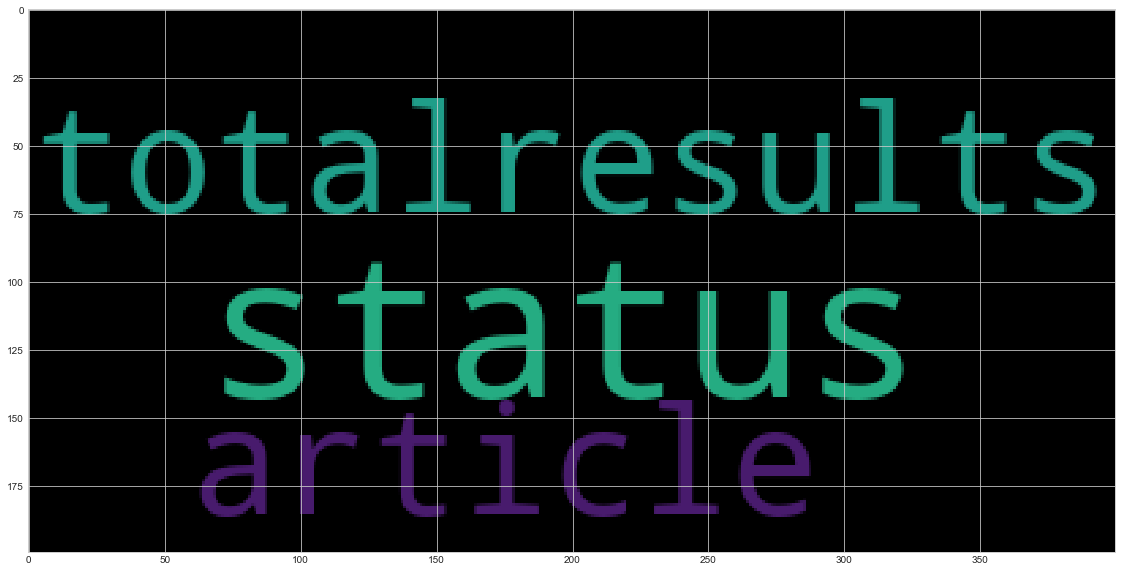

In [22]:
# Generate the Bitcoin word cloud

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

big_string = ' '.join(bitcoin_news_en)
input_words = process_text(big_string)

wc = WordCloud().generate(input_words)
plt.imshow(wc)

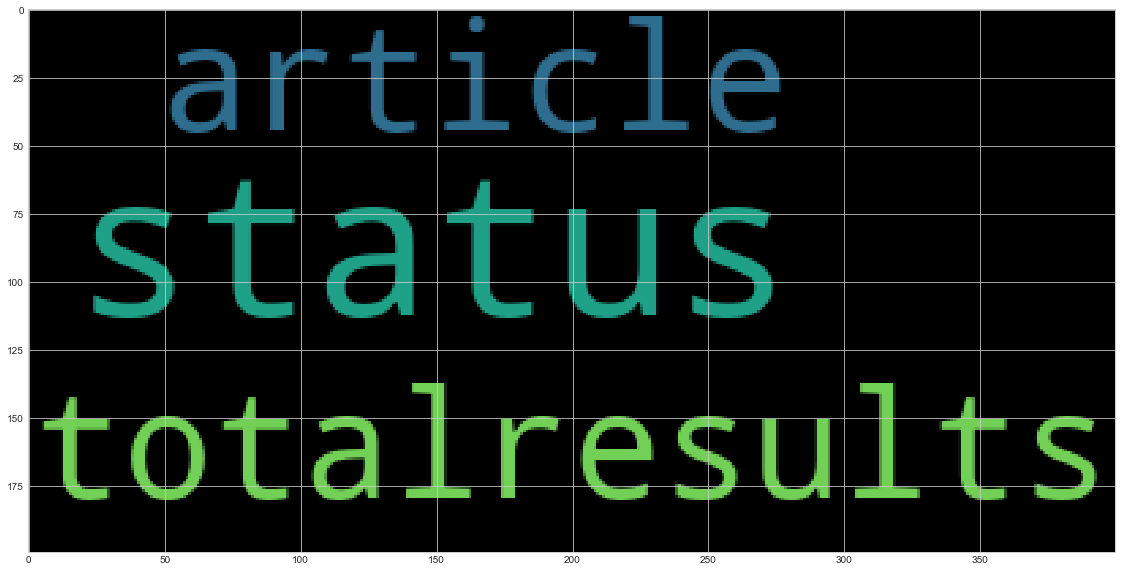

In [23]:
# Generate the Ethereum word cloud
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

big_string = ' '.join(ethereum_news_en)
input_words = process_text(big_string)

wc = WordCloud().generate(input_words)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm



In [25]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [26]:
# Concatenate all of the Bitcoin text together
doc = bitcoin_news_en

In [27]:
# Run the NER processor on all of the text
displacy.render(doc, style='ent')

# Add a title to the document
# YOUR CODE HERE!

AttributeError: 'dict' object has no attribute 'ents'

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---